<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Sep  4 18:40:51 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.58.02              Driver Version: 555.58.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti     Off |   00000000:2D:00.0  On |                  N/A |
|  0%   35C    P8             12W /  130W |     485MiB /   6144MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.4.0+cu124


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

- health care
- autonomus vehicles
- retail (e.g. automated checkout systems)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

__Overfitting__ occurs when a machine learning model learns the details and noise in the training data to such an extent that it negatively impacts the model's performance on new, unseen data. Essentially, the model becomes too complex, capturing the noise along with the underlying patterns, which leads to poor generalization to the test or validation set.

To detect overfitting, we typically compare the model's performance on the training set to its performance on the test or validation set. If the model performs significantly better on the training data than on the test data, it indicates that the model may have overfitted the training data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- use more data - it makes it harder for the model to memorize the details and forces it to focus on general patterns, if we can't get more real samplews of data we can create them with data augmentation techniques
- use reguralisation techniques - they generaly make it harder to train the model, but they help it to generalise better
- reduce the model complexity - this is the last resort, we do it when all the other methods failed

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision.transforms import v2

In [4]:
transform = v2.Compose([
    v2.PILToTensor(),
    v2.ToDtype(torch.float32, scale=True)
])

train_ds = torchvision.datasets.MNIST("~/Data", download=True, transform=transform)
test_ds = torchvision.datasets.MNIST("~/Data", download=True, train=False, transform=transform)
train_ds, test_ds

(Dataset MNIST
     Number of datapoints: 60000
     Root location: /home/vertex/Data
     Split: Train
     StandardTransform
 Transform: Compose(
                  PILToTensor()
                  ToDtype(scale=True)
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: /home/vertex/Data
     Split: Test
     StandardTransform
 Transform: Compose(
                  PILToTensor()
                  ToDtype(scale=True)
            ))

## 6. Visualize at least 5 different samples of the MNIST training dataset.

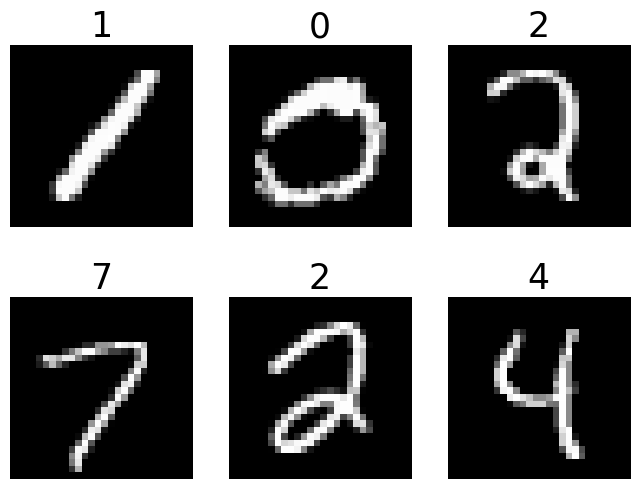

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6))
for i in range(6):
    idx = torch.randint(0, len(train_ds), [1]).item()
    img, label = train_ds[idx]
    fig.add_subplot(2, 3, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(label, fontsize=25)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=32)
batch, labels = next(iter(train_dl))
batch.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
from torch import nn

In [8]:
class TinyVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 10, 3, padding="same"),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.block2 = nn.Sequential(
            nn.Conv2d(10, 10, 3, padding="same"),
            nn.ReLU(),
            nn.Conv2d(10, 10, 3, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10*7*7, 10)
        )
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return self.classifier(x)

model = TinyVGG()
model

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [9]:
model.eval()
with torch.inference_mode():
    out = model(batch)

out.shape

torch.Size([32, 10])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
def train_step(model, optimizer, loss_fn, x, y):
    model.train()
    out = model(x)
    loss = loss_fn(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return out, loss

In [11]:
def test_step(model, optimizer, loss_fn, x, y):
    model.eval()
    with torch.inference_mode():
        out = model(x)
        loss = loss_fn(out, y)

    return out, loss

In [12]:
from timeit import default_timer as timer
from tqdm.auto import tqdm, trange

def learner(device):
    epochs = 5
    
    model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    time_start = timer()
    for epoch in tqdm(range(epochs), desc="Epoch"):
        train_acc = 0
        for x, y in tqdm(train_dl, desc="train", leave=False):
            x, y = x.to(device), y.to(device)
            train_out, train_loss = train_step(model, optimizer, loss_fn, x, y)
            train_acc += (train_out.argmax(dim=1) == y).sum().item()
    
        train_acc /= 60000
        
        test_acc = 0
        for x, y in tqdm(test_dl, desc="valid", leave=False):
            x, y = x.to(device), y.to(device)
            test_out, test_loss = test_step(model, optimizer, loss_fn, x, y)
            test_acc += (test_out.argmax(dim=1) == y).sum().item()
    
        test_acc /= 10000
    
        print(f"Epoch: {epoch} | train loss: {train_loss:.6f}, train acc: {train_acc:.6f} | test loss: {test_loss:.6f}, test acc: {test_acc:.6f}")

    time_end = timer()
    print(f"Training time: {time_end - time_start:.3f} s")

In [13]:
print("CPU:")
model = TinyVGG()
learner("cpu")

print("GPU:")
model = TinyVGG()
learner(device)

CPU:


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 0 | train loss: 0.184734, train acc: 0.879167 | test loss: 0.000574, test acc: 0.967100


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 1 | train loss: 0.237699, train acc: 0.977467 | test loss: 0.000924, test acc: 0.980200


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 2 | train loss: 0.002707, train acc: 0.983233 | test loss: 0.000920, test acc: 0.983100


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 3 | train loss: 0.120459, train acc: 0.985583 | test loss: 0.000069, test acc: 0.982900


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 4 | train loss: 0.003365, train acc: 0.987333 | test loss: 0.000460, test acc: 0.985600
Training time: 73.695 s
GPU:


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 0 | train loss: 0.057830, train acc: 0.897683 | test loss: 0.001330, test acc: 0.977900


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 1 | train loss: 0.011950, train acc: 0.977900 | test loss: 0.000885, test acc: 0.985000


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 2 | train loss: 0.101109, train acc: 0.983383 | test loss: 0.004574, test acc: 0.986100


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 3 | train loss: 0.077559, train acc: 0.985433 | test loss: 0.002182, test acc: 0.985900


train:   0%|          | 0/1875 [00:00<?, ?it/s]

valid:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 4 | train loss: 0.008800, train acc: 0.986800 | test loss: 0.015588, test acc: 0.985300
Training time: 47.310 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

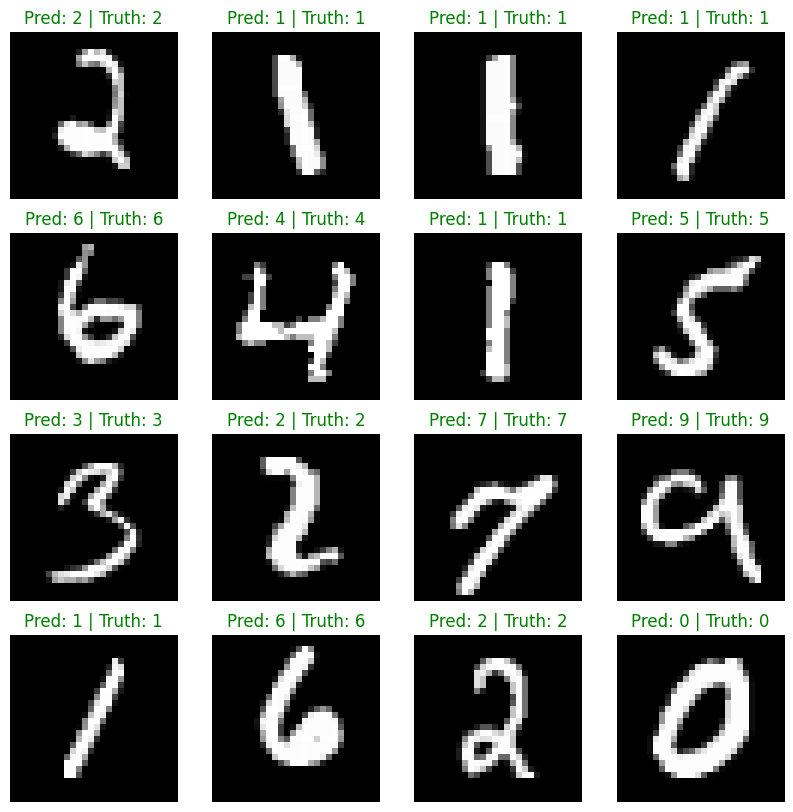

In [14]:
model.eval()
preds = []
for x, y in test_dl:
    x = x.to(device)
    with torch.inference_mode():
        out = model(x)

    preds.append(out.argmax(dim=1).to("cpu"))

preds = torch.cat(preds)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    idx = torch.randint(0, len(test_ds), [1]).item()
    img, label = test_ds[idx]
    
    fig.add_subplot(4, 4, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)
    if label == preds[idx]:
        plt.title(f"Pred: {preds[idx]} | Truth: {label}", c='g')
    else:
        plt.title(f"Pred: {preds[idx]} | Truth: {label}", c='r')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [21]:
test_ds.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

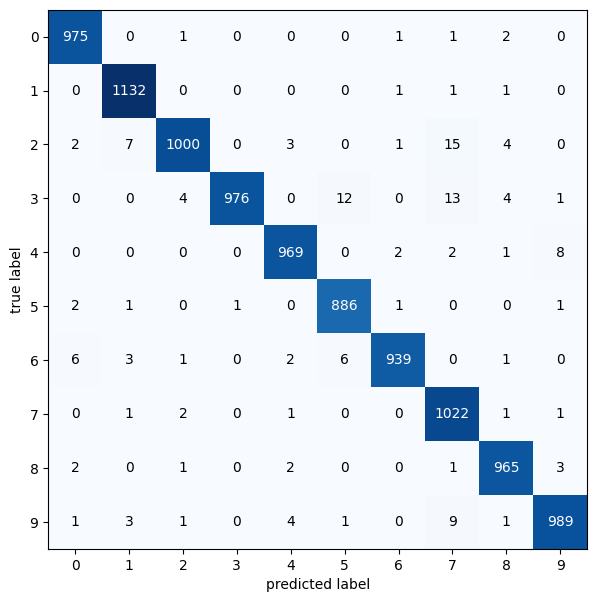

In [38]:
import torchmetrics
from mlxtend.plotting import plot_confusion_matrix

conf = torchmetrics.classification.MulticlassConfusionMatrix(10)
conf_mat = conf(preds, test_ds.targets).numpy()
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                figsize=(7,7))
ax.set_xticks(range(10))
ax.set_yticks(range(10));

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [62]:
x = torch.rand((1, 3, 64, 64))
conv1 = nn.Conv2d(3, 3, 3)
conv2 = nn.Conv2d(3, 3, 10)

conv1(x).shape, conv2(x).shape

(torch.Size([1, 3, 62, 62]), torch.Size([1, 3, 55, 55]))

big kernels reduce spatial size significantly